In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# pip install seaborn
import seaborn as sns

# Graphics in retina format are more sharp and legible

from sklearn.model_selection import train_test_split

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
#import libraries for making a pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.compose import make_column_selector
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer

In [9]:
#import data to dataframe
df = pd.read_csv("datasets/BankChurners.csv")
#drop last 2 columns as not required
df.drop(labels={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'},axis=1,inplace = True)
df.shape#(10127, 21)

(10127, 21)

Build a Pipeline for the following order
- Using the EDA create meaningful variables
- Use generic feature creation techniques(learn)
- Best way for feature selection(learn)
- Create pipeline to automate this process

In [14]:
#create numerical target var
df['Attrition_Flag']=df['Attrition_Flag'].apply(lambda x: 0 if x=='Existing Customer' else 1)
df_copy=df.copy()
df_copy['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [15]:
df_copy=df_copy.drop('CLIENTNUM',axis=1)
df_copy.shape
#(10127, 20)

(10127, 20)

In [16]:
#Feature pipeline here
#based on univariate DA
df_newcol=df_copy.copy()
df_newcol['MOB_lbl'] = pd.cut(df_copy['Months_on_book'], bins=[0, 24, 36, float('Inf')], 
                              labels=['<=24', '24-36', '>36'],include_lowest = True)
df_newcol['Ina_12_cnt_lbl'] = pd.cut(df_copy['Months_Inactive_12_mon'], bins=[0, 3, float('Inf')],
                                     labels=['<=3', '>3'],include_lowest = True)
df_newcol['Credit_Limit_lbl'] = pd.cut(df_copy['Credit_Limit'], bins=[0, 5000, 10000,15000,30000,float('Inf')], 
                                       labels=['0-5k', '5-10k','10-15k','15-30k','>30k'],include_lowest = True)
df_newcol['util_lbl'] = pd.cut(df_copy['Avg_Utilization_Ratio'], bins=[0, 0.2,0.5, float('Inf')], 
                                       labels=['0-0.2','0.2-0.5','>0.5'],include_lowest = True)
df_newcol['Trans_Amt_lbl'] = pd.cut(df_copy['Total_Trans_Amt'], bins=[0, 5000, 12500, float('Inf')], 
                                       labels=['0-5k','5-12.5k','>12.5k'],include_lowest = True)
df_newcol['Trans_Ct_lbl'] = pd.cut(df_copy['Total_Trans_Ct'], bins=[0, 50,100, float('Inf')], 
                                       labels=['0-50','50-100','>100'],include_lowest = True)



In [17]:
import seaborn as sns

<AxesSubplot:>

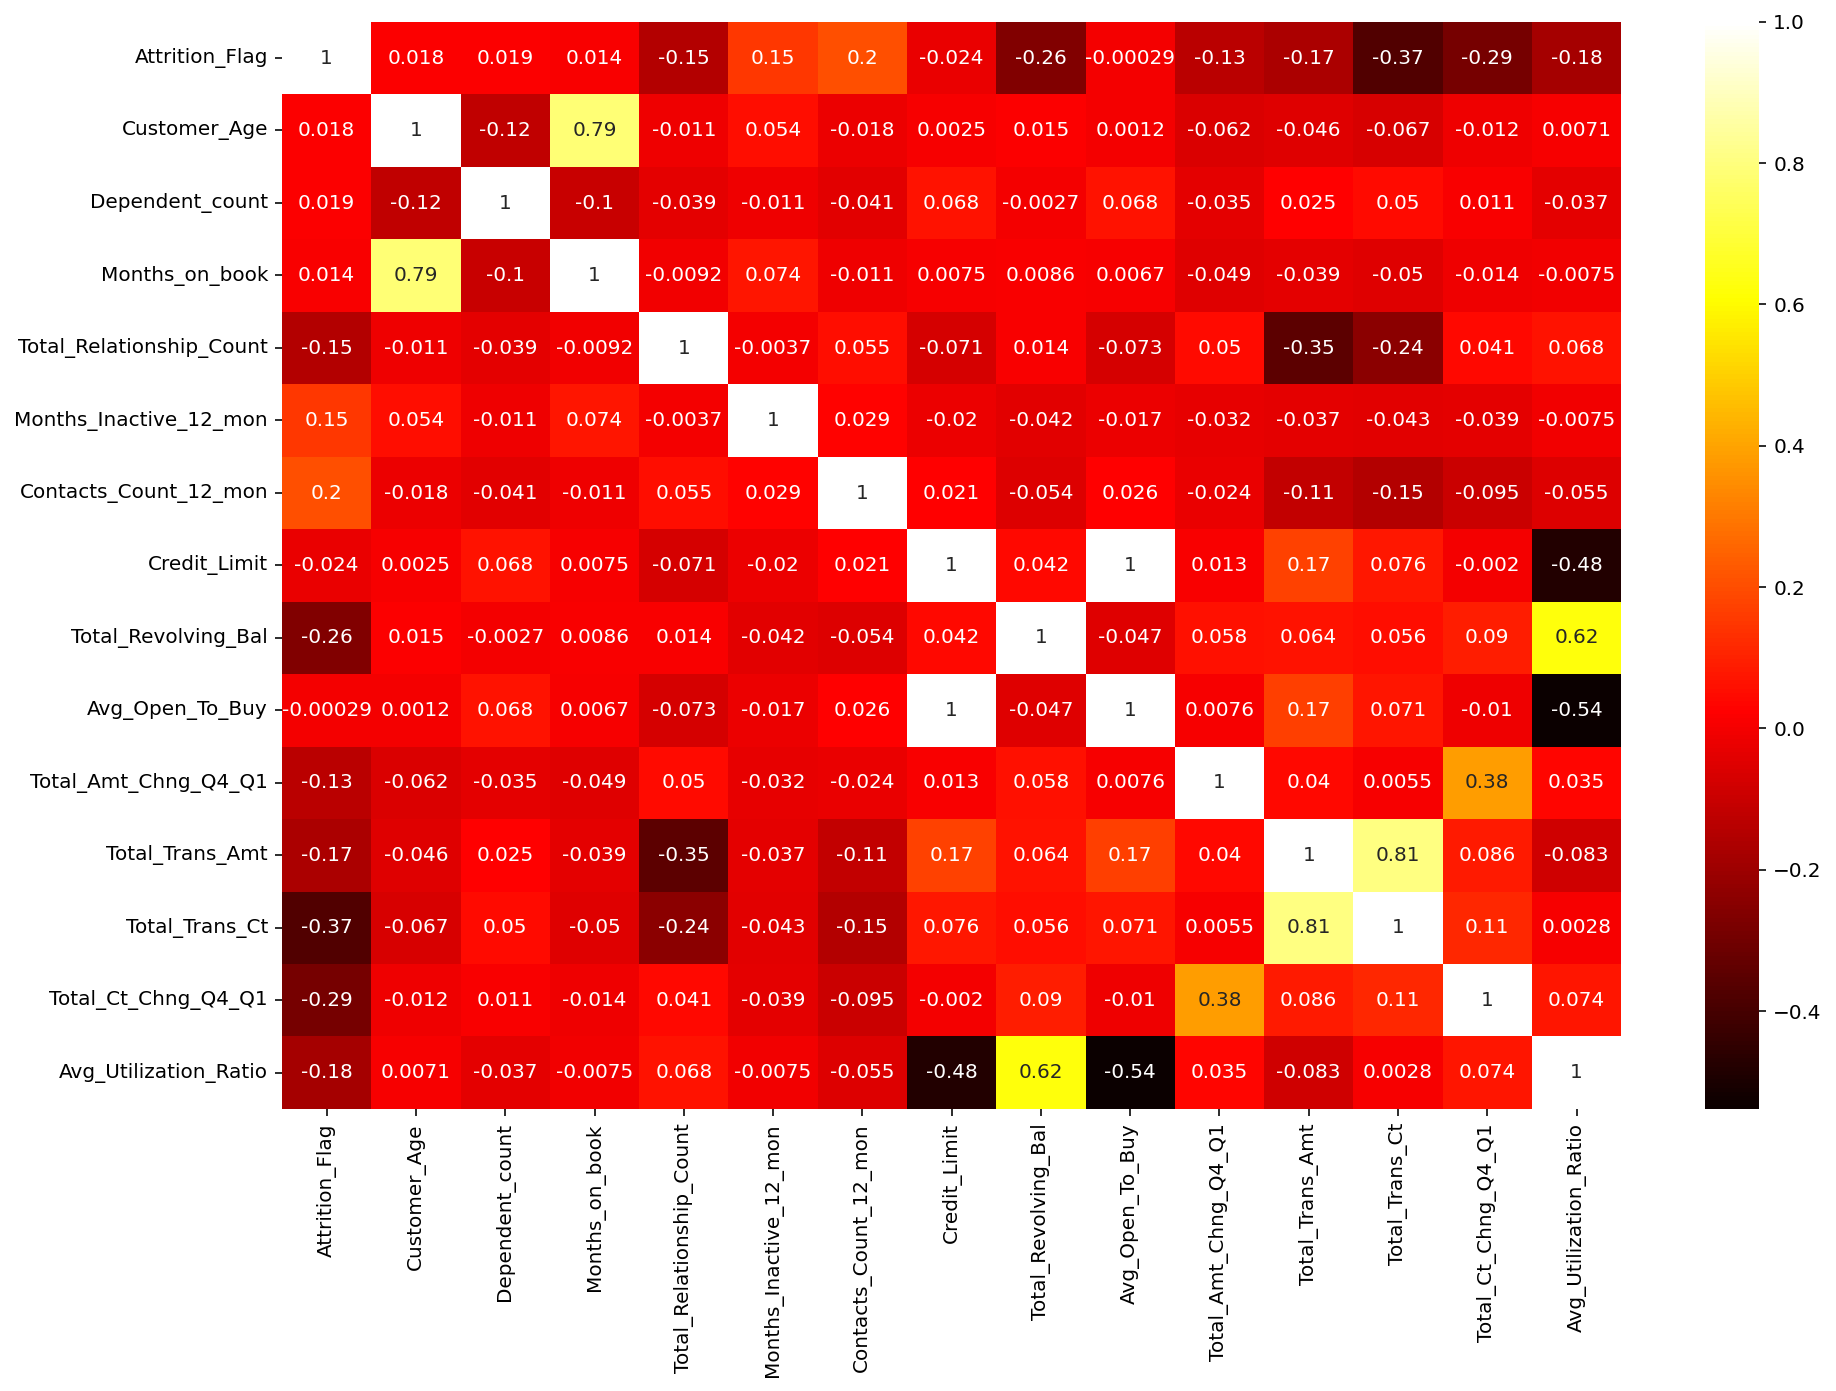

In [18]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(df_newcol.corr(),cmap='hot',annot=True)

<AxesSubplot:>

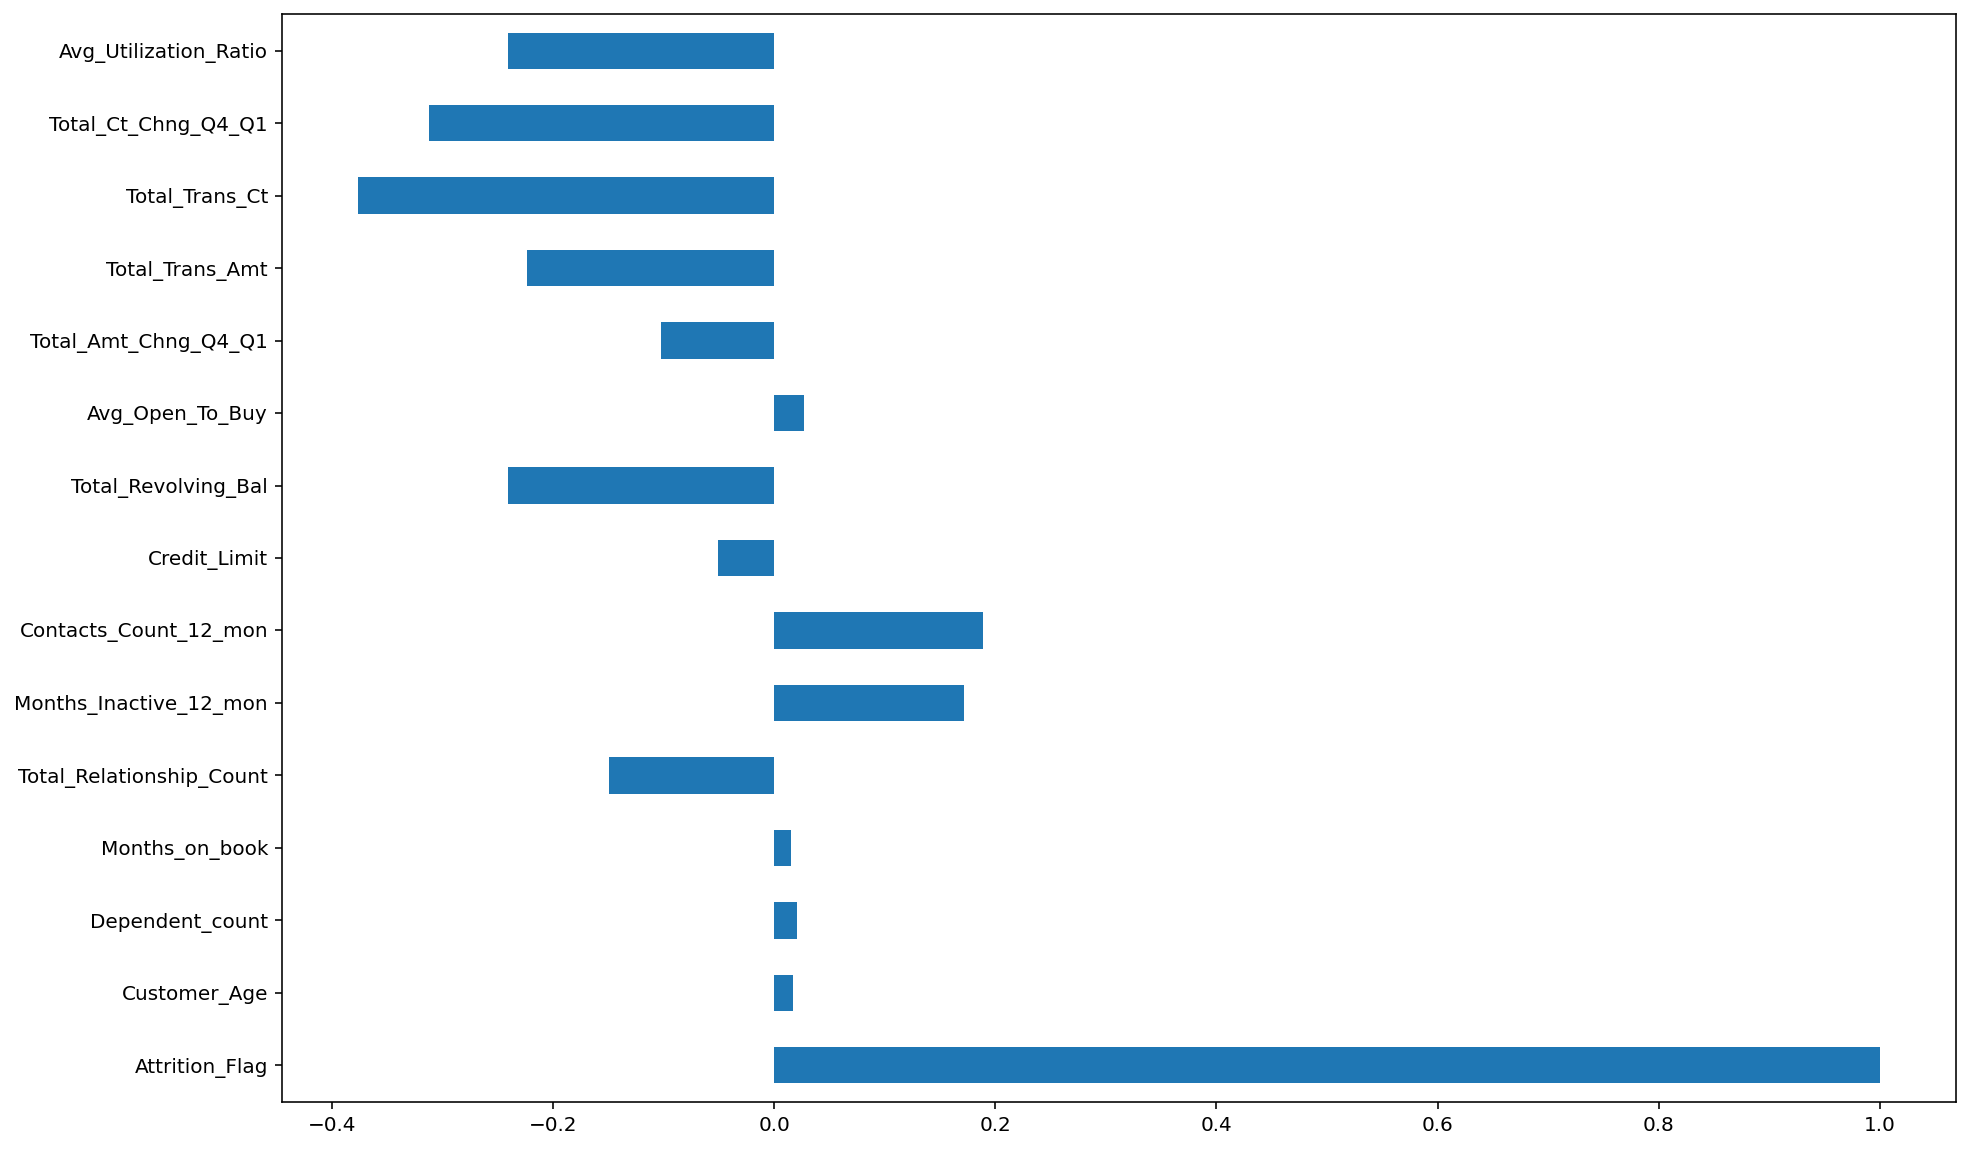

In [29]:
fig, ax = plt.subplots(figsize=(15,10)) 
df_newcol.corr(method='spearman')['Attrition_Flag'].plot(kind='barh')

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(df_train_data, df_train_target)

ValueError: could not convert string to float: 'F'

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()